## Reading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
    
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=None

In [2]:
cc = pd.read_csv('credit_card.csv')
cc.rename(columns={'PAY_1':'Repay_Sept', 'PAY_2':'Repay_Aug', 'PAY_3':'Repay_July', 
                   'PAY_4':'Repay_Jun', 'PAY_5':'Repay_May', 'PAY_6':'Repay_April',
                   'BILL_AMT1':'Bill_Amt_Sept', 'BILL_AMT2':'Bill_Amt_Aug', 'BILL_AMT3':'Bill_Amt_July', 
                   'BILL_AMT4':'Bill_Amt_Jun', 'BILL_AMT5':'Bill_Amt_May', 'BILL_AMT6':'Bill_Amt_April',
                   'PAY_AMT1':'Pre_Pay_Sept', 'PAY_AMT2':'Pre_Pay_Aug', 'PAY_AMT3':'Pre_Pay_July', 
                   'PAY_AMT4':'Pre_Pay_Jun', 'PAY_AMT5':'Pre_Pay_May', 'PAY_AMT6':'Pre_Pay_April'
                  }, inplace=True)
cc.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repay_Sept,Repay_Aug,Repay_July,Repay_Jun,Repay_May,Repay_April,Bill_Amt_Sept,Bill_Amt_Aug,Bill_Amt_July,Bill_Amt_Jun,Bill_Amt_May,Bill_Amt_April,Pre_Pay_Sept,Pre_Pay_Aug,Pre_Pay_July,Pre_Pay_Jun,Pre_Pay_May,Pre_Pay_April,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,1000,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                30000 non-null int64
LIMIT_BAL         30000 non-null int64
SEX               30000 non-null int64
EDUCATION         30000 non-null int64
MARRIAGE          30000 non-null int64
AGE               30000 non-null int64
Repay_Sept        30000 non-null int64
Repay_Aug         30000 non-null int64
Repay_July        30000 non-null int64
Repay_Jun         30000 non-null int64
Repay_May         30000 non-null int64
Repay_April       30000 non-null int64
Bill_Amt_Sept     30000 non-null int64
Bill_Amt_Aug      30000 non-null int64
Bill_Amt_July     30000 non-null int64
Bill_Amt_Jun      30000 non-null int64
Bill_Amt_May      30000 non-null int64
Bill_Amt_April    30000 non-null int64
Pre_Pay_Sept      30000 non-null int64
Pre_Pay_Aug       30000 non-null int64
Pre_Pay_July      30000 non-null int64
Pre_Pay_Jun       30000 non-null int64
Pre_Pay_May       30000 non-null 

## EDA

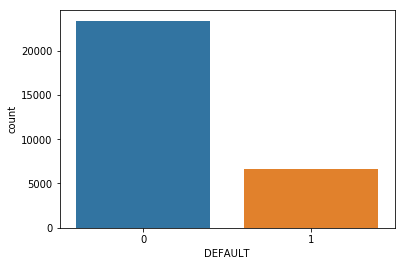

In [4]:
sns.countplot(cc['DEFAULT'])
plt.show()

In [5]:
cat_cols = ['SEX','EDUCATION', 'MARRIAGE']
cc[cat_cols] = cc[cat_cols].astype('category')
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                30000 non-null int64
LIMIT_BAL         30000 non-null int64
SEX               30000 non-null category
EDUCATION         30000 non-null category
MARRIAGE          30000 non-null category
AGE               30000 non-null int64
Repay_Sept        30000 non-null int64
Repay_Aug         30000 non-null int64
Repay_July        30000 non-null int64
Repay_Jun         30000 non-null int64
Repay_May         30000 non-null int64
Repay_April       30000 non-null int64
Bill_Amt_Sept     30000 non-null int64
Bill_Amt_Aug      30000 non-null int64
Bill_Amt_July     30000 non-null int64
Bill_Amt_Jun      30000 non-null int64
Bill_Amt_May      30000 non-null int64
Bill_Amt_April    30000 non-null int64
Pre_Pay_Sept      30000 non-null int64
Pre_Pay_Aug       30000 non-null int64
Pre_Pay_July      30000 non-null int64
Pre_Pay_Jun       30000 non-null int64
Pre_Pay_May       30000 

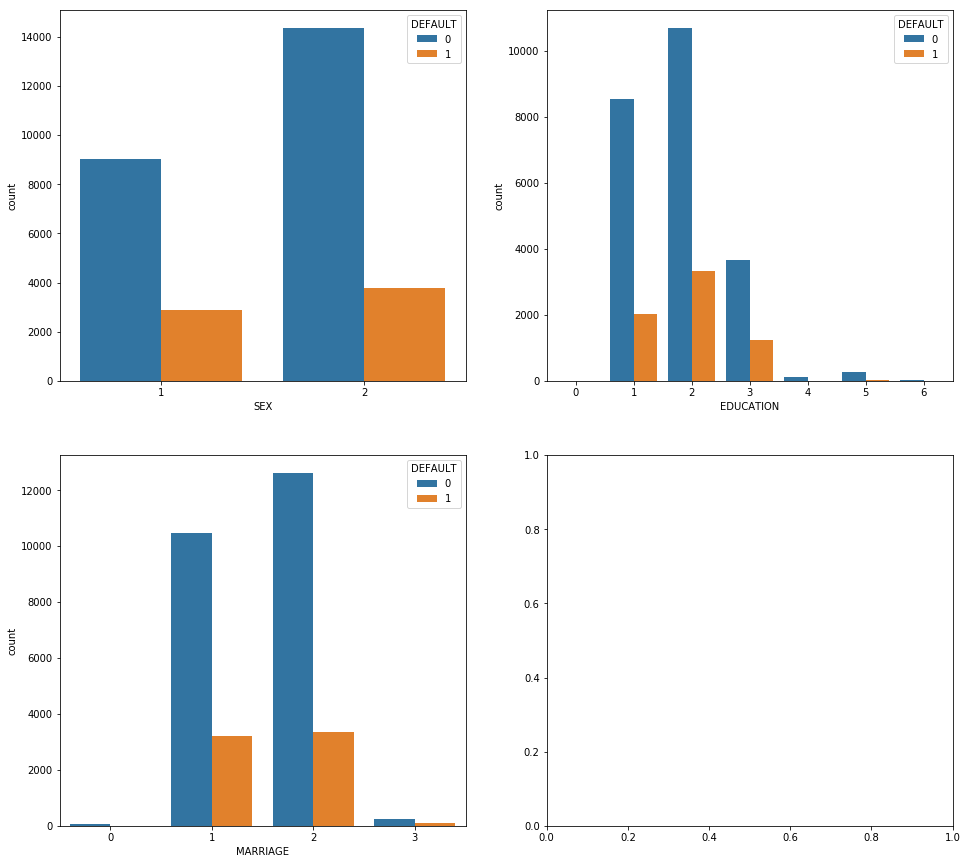

In [6]:
fig,ax = plt.subplots(2,2,figsize=(16,15))
ax = ax.flatten()
for i,col in enumerate(cat_cols):
    sns.countplot(x=col, hue='DEFAULT', data=cc, ax=ax[i])

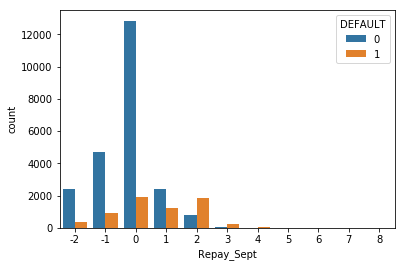

In [7]:
sns.countplot(x='Repay_Sept', hue='DEFAULT', data=cc)
plt.show()

In [8]:
cc[cc['Repay_April']==0 ]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repay_Sept,Repay_Aug,Repay_July,Repay_Jun,Repay_May,Repay_April,Bill_Amt_Sept,Bill_Amt_Aug,Bill_Amt_July,Bill_Amt_Jun,Bill_Amt_May,Bill_Amt_April,Pre_Pay_Sept,Pre_Pay_Aug,Pre_Pay_July,Pre_Pay_Jun,Pre_Pay_May,Pre_Pay_April,DEFAULT
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
14,15,250000,1,1,2,29,0,0,0,0,0,0,70887,67060,63561,59696,56875,55512,3000,3000,3000,3000,3000,3000,0
15,16,50000,2,3,3,23,1,2,0,0,0,0,50614,29173,28116,28771,29531,30211,0,1500,1100,1200,1300,1100,0
24,25,90000,1,1,2,23,0,0,0,-1,0,0,4744,7070,0,5398,6360,8292,5757,0,5398,1200,2045,2000,0
25,26,50000,1,3,2,23,0,0,0,0,0,0,47620,41810,36023,28967,29829,30046,1973,1426,1001,1432,1062,997,0


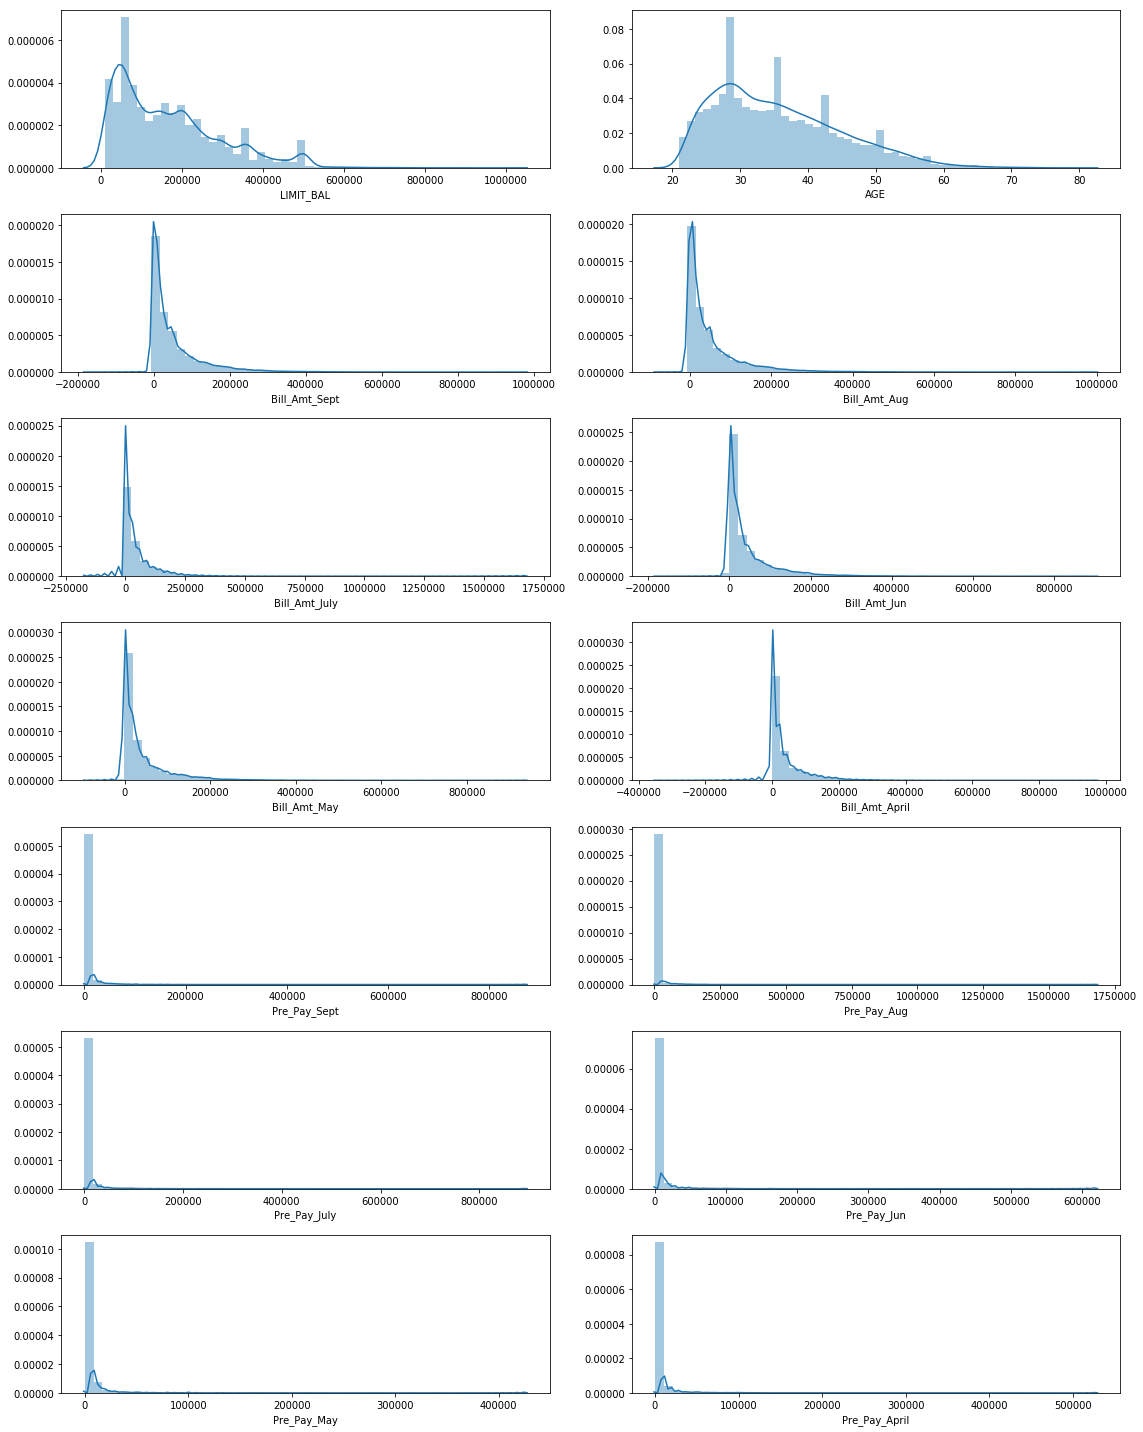

In [9]:
fig,ax = plt.subplots(7,2,figsize=(16,20))
ax = ax.flatten()
num_cols = ['LIMIT_BAL', 'AGE', 'Bill_Amt_Sept', 'Bill_Amt_Aug', 'Bill_Amt_July', 'Bill_Amt_Jun', 
            'Bill_Amt_May', 'Bill_Amt_April', 'Pre_Pay_Sept', 'Pre_Pay_Aug', 'Pre_Pay_July', 'Pre_Pay_Jun', 
            'Pre_Pay_May', 'Pre_Pay_April']
for i,col in enumerate(num_cols):
    sns.distplot(cc[col], ax=ax[i])
    
plt.tight_layout()
plt.show()

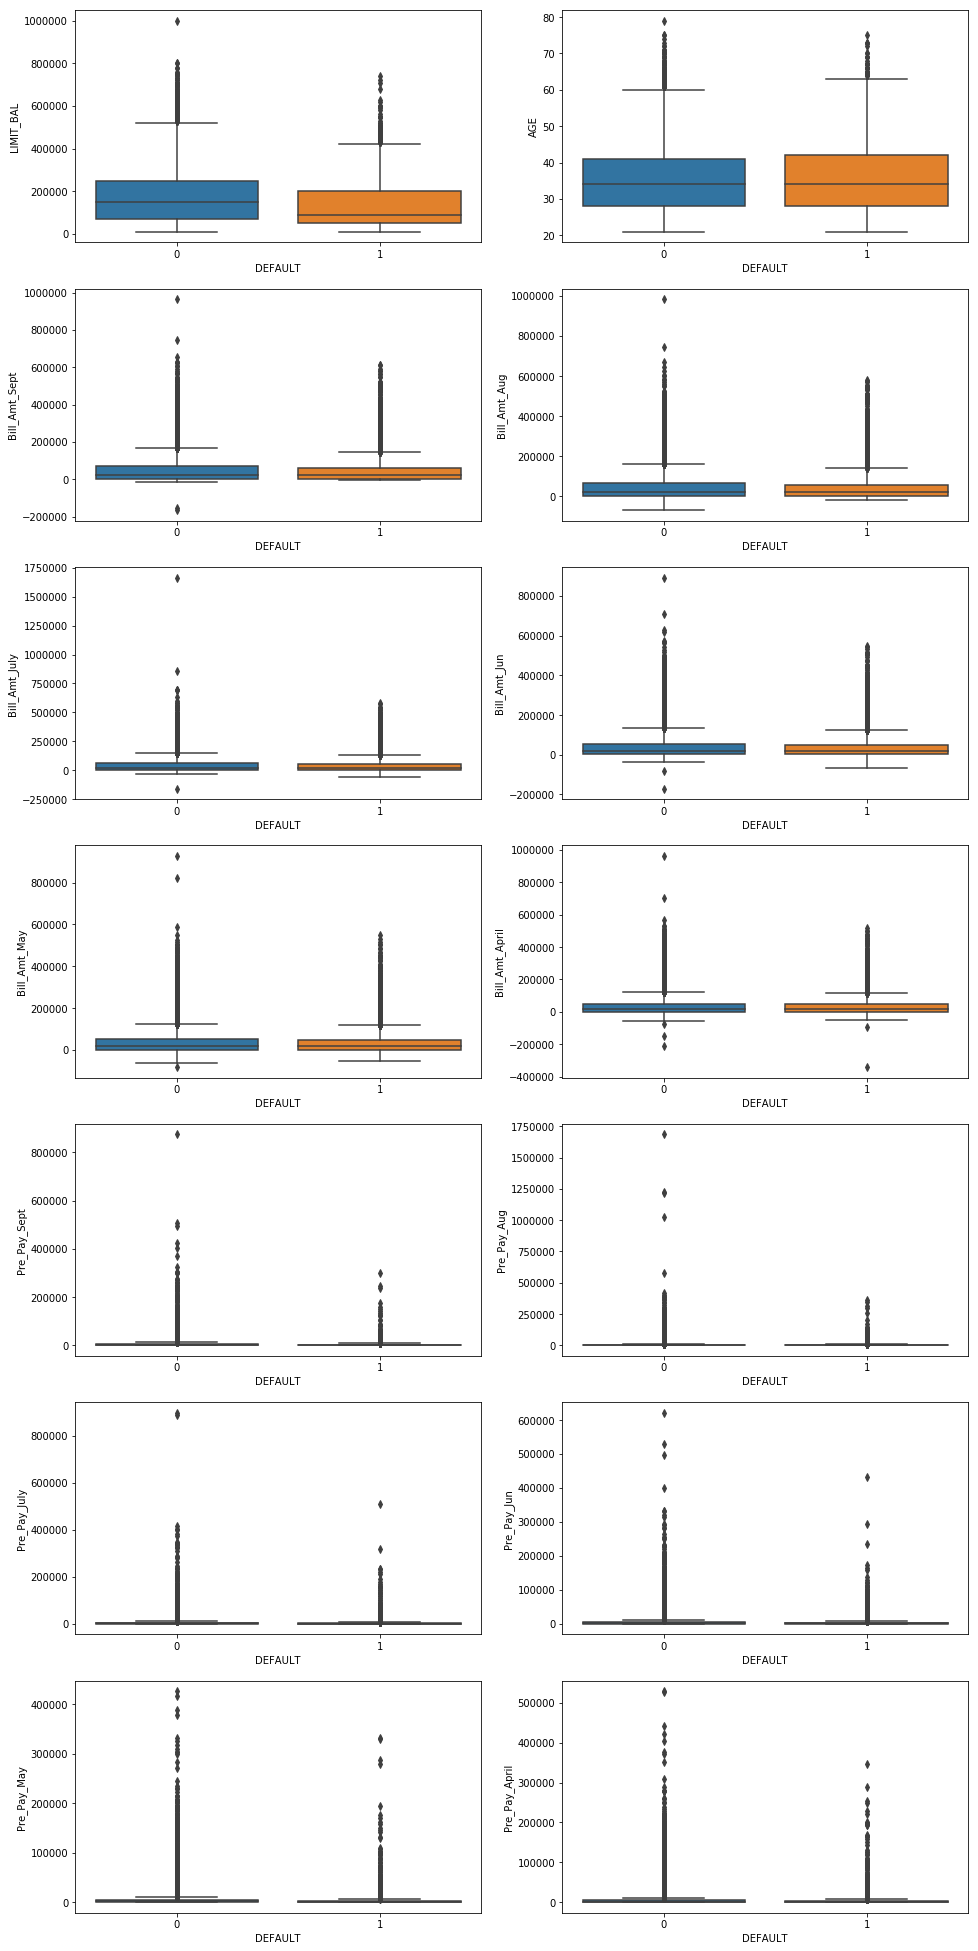

In [10]:
fig,ax = plt.subplots(7,2,figsize=(16,35))
ax=ax.flatten()
for i,col in enumerate(num_cols):
    sns.boxplot(x='DEFAULT', y=col, data=cc, ax=ax[i])
plt.show()

In [11]:
cols = ['LIMIT_BAL','DEFAULT']

for month in ['April','May','Jun','July','Aug','Sept']:
    for val in ['Pre_Pay','Repay','Bill_Amt']:
        cols.append(val+'_'+month)

cc[cols]

,LIMIT_BAL,DEFAULT,Pre_Pay_April,Repay_April,Bill_Amt_April,Pre_Pay_May,Repay_May,Bill_Amt_May,Pre_Pay_Jun,Repay_Jun,Bill_Amt_Jun,Pre_Pay_July,Repay_July,Bill_Amt_July,Pre_Pay_Aug,Repay_Aug,Bill_Amt_Aug,Pre_Pay_Sept,Repay_Sept,Bill_Amt_Sept
0,20000,1,0,-2,0,0,-2,0,0,-1,0,0,-1,689,689,2,1000,0,2,3913
1,120000,1,2000,2,3261,0,0,3455,1000,0,3272,1000,0,2682,1000,2,1725,0,-1,2682
2,90000,0,5000,0,15549,1000,0,14948,1000,0,14331,1000,0,13559,1500,0,14027,1518,0,29239
3,50000,0,1000,0,29547,1069,0,28959,1100,0,28314,1200,0,49291,2019,0,48233,2000,0,46990
4,50000,0,679,0,19131,689,0,19146,9000,0,20940,10000,-1,35835,36681,0,5670,2000,-1,8617
5,50000,0,800,0,20024,1000,0,19619,1000,0,19394,657,0,57608,1815,0,57069,2500,0,64400
6,500000,0,13770,0,473944,13750,0,483003,20239,0,542653,38000,0,445007,40000,0,412023,55000,0,367965
7,100000,0,1542,-1,567,1687,0,-159,581,0,221,0,-1,601,601,-1,380,380,0,11876
8,140000,0,1000,0,3719,1000,0,11793,1000,0,12211,432,2,12108,0,0,14096,3329,0,11285
9,20000,0,0,-1,13912,1122,-1,13007,13007,-2,0,0,-2,0,0,-2,0,0,-2,0


## Hypothesis Testing

In [12]:
cc.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Repay_Sept',
       'Repay_Aug', 'Repay_July', 'Repay_Jun', 'Repay_May', 'Repay_April',
       'Bill_Amt_Sept', 'Bill_Amt_Aug', 'Bill_Amt_July', 'Bill_Amt_Jun',
       'Bill_Amt_May', 'Bill_Amt_April', 'Pre_Pay_Sept', 'Pre_Pay_Aug',
       'Pre_Pay_July', 'Pre_Pay_Jun', 'Pre_Pay_May', 'Pre_Pay_April',
       'DEFAULT'],
      dtype='object')

In [13]:
def chisquare_test(target_variable, categorical_column):
    print('H0: There is NO association between ' + target_variable.name + ' and ' + categorical_column.name)
    print('Ha: There is an association between ' + target_variable.name + ' and ' + categorical_column.name)
    print()
    ct = pd.crosstab(target_variable, categorical_column)
    print(ct)
    chi2_ct = stats.chi2_contingency(ct)
    chival = chi2_ct[0]
    pval = chi2_ct[1]
    print()
    print('chi-val =', chival)
    print('p-val =', pval)
    print()
    rejectH0 = pval < 0.05
    if rejectH0:
        print('Reject H0')
    else:
        print('Failed to reject H0')
    print()
    print('---------------------------------------------------------------')
    return rejectH0

In [14]:
def two_sample_ttest(target_variable, numerical_column):
    print('H0: The mean of ' + numerical_column.name + ' is equal for both categories of ' + target_variable.name)
    print('Ha: The mean of ' + numerical_column.name + ' is NOT equal for both categories of ' + target_variable.name)
    print()
    
    grp0 = numerical_column[target_variable == 0]
    grp1 = numerical_column[target_variable == 1]
    
    print('Mean of grp0 =', grp0.mean())
    print('Mean of grp1 =', grp1.mean())
    
    fig, ax = plt.subplots(figsize=(10,5))
    plt.boxplot([grp0, grp1])
    ax.set_xticklabels([0,1])
    plt.xlabel(target_variable.name)
    plt.ylabel(numerical_column.name)
    plt.show()
    
    print()
    print('Test of Normality: ')
    grp0_shapiro = stats.shapiro(grp0)
    grp1_shapiro = stats.shapiro(grp1)
    
    grp0_normal = grp0_shapiro[1] > 0.05
    grp1_normal = grp1_shapiro[1] > 0.05
    
    print('Shapiro on grp0 =', grp0_shapiro, end=' ')
    
    if grp0_normal:
        print('[grp0 follows normal distribution]')
    else:
        print('[grp0 DOES NOT follow normal distribution]')
        
    
    print('Shapiro on grp1 =', grp1_shapiro, end=' ')
    if grp1_normal:
        print('[grp1 follows normal distribution]')
    else:
        print('[grp1 DOES NOT follow normal distribution]')
    print()
    
    print('Test of Variance:')
    if grp0_normal and grp1_normal:
        print('Levene Test:')
        lev = stats.levene(grp0, grp1)
        print(lev)
        equal_variance = lev[1] > 0.05
    else:
        print('Bartlett Test:')
        bart = stats.bartlett(grp0, grp1)
        print(bart)
        equal_variance = bart[1] > 0.05
        
    if equal_variance:
        print('[Variance of grp0 and grp1 are EQUAL]')
    else:
        print('[Variance of grp0 and grp1 are NOT EQUAL]')
    print()
    
    if grp0_normal and grp1_normal and equal_variance:
        print('Parametric Test of Means:')
        ttest = stats.ttest_ind(grp0, grp1)
        print(ttest)
        rejectH0 = ttest[1] < 0.05
    else:
        print('Non-parametric Test of Means:')
        mann = stats.mannwhitneyu(grp0, grp1)
        print(mann)
        rejectH0 = mann[1] < 0.05
    
    print()
    if rejectH0:
        print('Reject H0: [Means of grp0 and grp1 are NOT EQUAL]')
    else:
        print('Failed to Reject H0: [Means of grp0 and grp1 are EQUAL]')        
        
    print()
    print('-------------------------------------------------------------------------')
    return rejectH0

### Categorical Columns

In [15]:
cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE']

for col in cat_cols:
    chisquare_test(cc['DEFAULT'], cc[col])

H0: There is NO association between DEFAULT and SEX
Ha: There is an association between DEFAULT and SEX

SEX         1      2
DEFAULT             
0        9015  14349
1        2873   3763

chi-val = 47.70879689062111
p-val = 4.944678999412044e-12

Reject H0

---------------------------------------------------------------
H0: There is NO association between DEFAULT and EDUCATION
Ha: There is an association between DEFAULT and EDUCATION

EDUCATION   0     1      2     3    4    5   6
DEFAULT                                       
0          14  8549  10700  3680  116  262  43
1           0  2036   3330  1237    7   18   8

chi-val = 163.21655786997073
p-val = 1.2332626245415605e-32

Reject H0

---------------------------------------------------------------
H0: There is NO association between DEFAULT and MARRIAGE
Ha: There is an association between DEFAULT and MARRIAGE

MARRIAGE   0      1      2    3
DEFAULT                        
0         49  10453  12623  239
1          5   3206   3

### Repay columns

In [16]:
repay_cols = ['Repay_Sept', 'Repay_Aug', 'Repay_July', 'Repay_Jun', 'Repay_May', 'Repay_April']

for col in repay_cols:
    repay_cut = pd.cut(cc[col], bins=[-3,0,9], labels=['<=0', '>0'])
    chisquare_test(cc['DEFAULT'], repay_cut)

H0: There is NO association between DEFAULT and Repay_Sept
Ha: There is an association between DEFAULT and Repay_Sept

Repay_Sept    <=0    >0
DEFAULT                
0           19975  3389
1            3207  3429

chi-val = 4063.187555923154
p-val = 0.0

Reject H0

---------------------------------------------------------------
H0: There is NO association between DEFAULT and Repay_Aug
Ha: There is an association between DEFAULT and Repay_Aug

Repay_Aug    <=0    >0
DEFAULT               
0          21402  1962
1           4160  2476

chi-val = 3425.4792733130525
p-val = 0.0

Reject H0

---------------------------------------------------------------
H0: There is NO association between DEFAULT and Repay_July
Ha: There is an association between DEFAULT and Repay_July

Repay_July    <=0    >0
DEFAULT                
0           21353  2011
1            4434  2202

chi-val = 2583.693928425119
p-val = 0.0

Reject H0

---------------------------------------------------------------
H0: There

In [17]:
cc.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Repay_Sept',
       'Repay_Aug', 'Repay_July', 'Repay_Jun', 'Repay_May', 'Repay_April',
       'Bill_Amt_Sept', 'Bill_Amt_Aug', 'Bill_Amt_July', 'Bill_Amt_Jun',
       'Bill_Amt_May', 'Bill_Amt_April', 'Pre_Pay_Sept', 'Pre_Pay_Aug',
       'Pre_Pay_July', 'Pre_Pay_Jun', 'Pre_Pay_May', 'Pre_Pay_April',
       'DEFAULT'],
      dtype='object')

In [18]:
cc['Repay_Sept_Cut'] = cc['Repay_Sept'].clip(0,1)
cc['Repay_Aug_Cut'] = cc['Repay_Aug'].clip(0,1)
cc['Repay_July_Cut'] = cc['Repay_July'].clip(0,1)
cc['Repay_Jun_Cut'] = cc['Repay_Jun'].clip(0,1)
cc['Repay_May_Cut'] = cc['Repay_May'].clip(0,1)
cc['Repay_April_Cut'] = cc['Repay_April'].clip(0,1)

### Numerical Columns

H0: The mean of LIMIT_BAL is equal for both categories of DEFAULT
Ha: The mean of LIMIT_BAL is NOT equal for both categories of DEFAULT

Mean of grp0 = 178099.72607430234
Mean of grp1 = 130109.65641952984


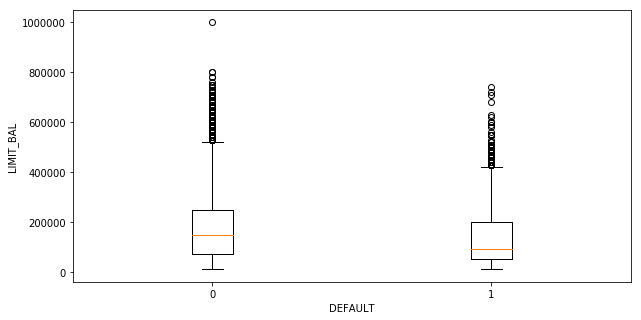


Test of Normality: 
Shapiro on grp0 = (0.9197262525558472, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.8549830913543701, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=170.63036533986386, pvalue=5.388772706126834e-39)
[Variance of grp0 and grp1 are NOT EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=59257217.5, pvalue=6.127742909111652e-190)

Reject H0: [Means of grp0 and grp1 are NOT EQUAL]

-------------------------------------------------------------------------
H0: The mean of AGE is equal for both categories of DEFAULT
Ha: The mean of AGE is NOT equal for both categories of DEFAULT

Mean of grp0 = 35.417265879130284
Mean of grp1 = 35.72573839662447


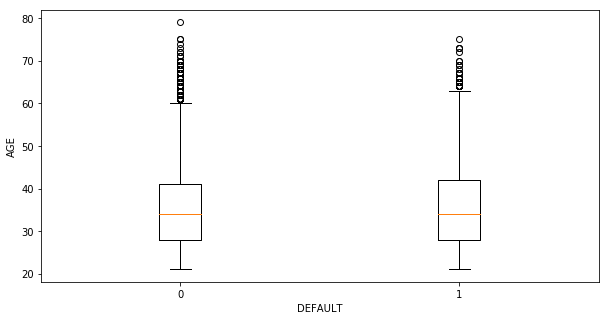


Test of Normality: 
Shapiro on grp0 = (0.9496142864227295, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.9501639008522034, 1.0733946236728099e-42) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=45.64727712369747, pvalue=1.4158274833025965e-11)
[Variance of grp0 and grp1 are NOT EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=76966879.5, pvalue=0.1862517717449308)

Failed to Reject H0: [Means of grp0 and grp1 are EQUAL]

-------------------------------------------------------------------------
H0: The mean of Bill_Amt_Sept is equal for both categories of DEFAULT
Ha: The mean of Bill_Amt_Sept is NOT equal for both categories of DEFAULT

Mean of grp0 = 51994.22727272727
Mean of grp1 = 48509.162296564195


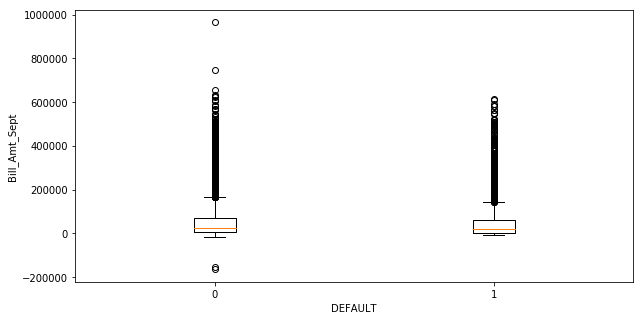


Test of Normality: 
Shapiro on grp0 = (0.7077071666717529, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.6597211360931396, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=0.07966251187823321, pvalue=0.7777552860681165)
[Variance of grp0 and grp1 are EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=74791058.5, pvalue=5.755190912649123e-06)

Reject H0: [Means of grp0 and grp1 are NOT EQUAL]

-------------------------------------------------------------------------
H0: The mean of Bill_Amt_Aug is equal for both categories of DEFAULT
Ha: The mean of Bill_Amt_Aug is NOT equal for both categories of DEFAULT

Mean of grp0 = 49717.43567026194
Mean of grp1 = 47283.301084990955


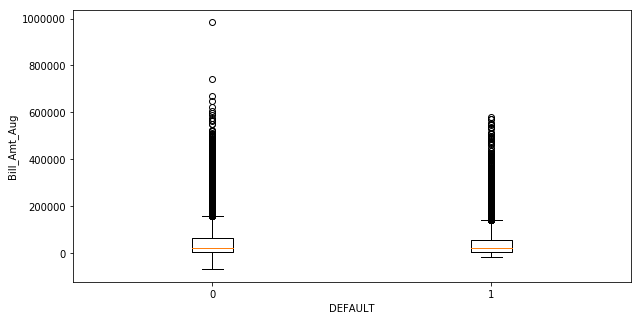


Test of Normality: 
Shapiro on grp0 = (0.7044762372970581, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.6616393327713013, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=0.7863201319831559, pvalue=0.37521516133056443)
[Variance of grp0 and grp1 are EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=75843289.5, pvalue=0.0035014139887217617)

Reject H0: [Means of grp0 and grp1 are NOT EQUAL]

-------------------------------------------------------------------------
H0: The mean of Bill_Amt_July is equal for both categories of DEFAULT
Ha: The mean of Bill_Amt_July is NOT equal for both categories of DEFAULT

Mean of grp0 = 47533.36560520459
Mean of grp1 = 45181.59885473177


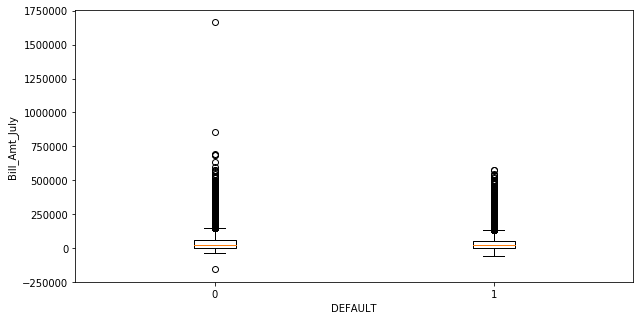


Test of Normality: 
Shapiro on grp0 = (0.6865330934524536, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.6634525060653687, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=2.4203685776114914, pvalue=0.11976674799448546)
[Variance of grp0 and grp1 are EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=76156098.5, pvalue=0.014101350680999257)

Reject H0: [Means of grp0 and grp1 are NOT EQUAL]

-------------------------------------------------------------------------
H0: The mean of Bill_Amt_Jun is equal for both categories of DEFAULT
Ha: The mean of Bill_Amt_Jun is NOT equal for both categories of DEFAULT

Mean of grp0 = 43611.16525423729
Mean of grp1 = 42036.950572634116


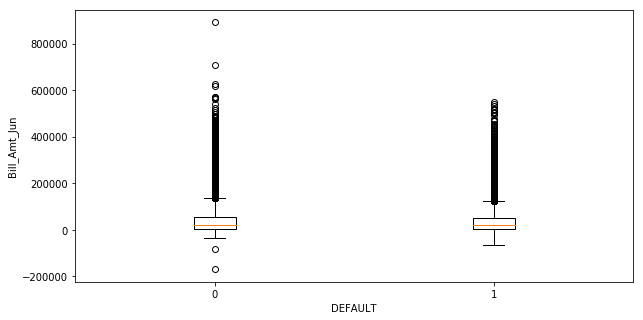


Test of Normality: 
Shapiro on grp0 = (0.6877426505088806, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.6591141223907471, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=0.001724429321889087, pvalue=0.9668763675499674)
[Variance of grp0 and grp1 are EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=76621117.5, pvalue=0.07388390926897154)

Failed to Reject H0: [Means of grp0 and grp1 are EQUAL]

-------------------------------------------------------------------------
H0: The mean of Bill_Amt_May is equal for both categories of DEFAULT
Ha: The mean of Bill_Amt_May is NOT equal for both categories of DEFAULT

Mean of grp0 = 40530.44534326314
Mean of grp1 = 39540.19047619047


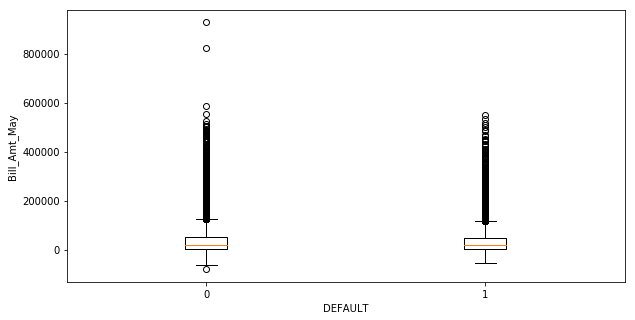


Test of Normality: 
Shapiro on grp0 = (0.6830272674560547, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.6532160043716431, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=1.818343668985304, pvalue=0.17751056091790224)
[Variance of grp0 and grp1 are EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=76783544.0, pvalue=0.11768351130808508)

Failed to Reject H0: [Means of grp0 and grp1 are EQUAL]

-------------------------------------------------------------------------
H0: The mean of Bill_Amt_April is equal for both categories of DEFAULT
Ha: The mean of Bill_Amt_April is NOT equal for both categories of DEFAULT

Mean of grp0 = 39042.268703989044
Mean of grp1 = 38271.43550331525


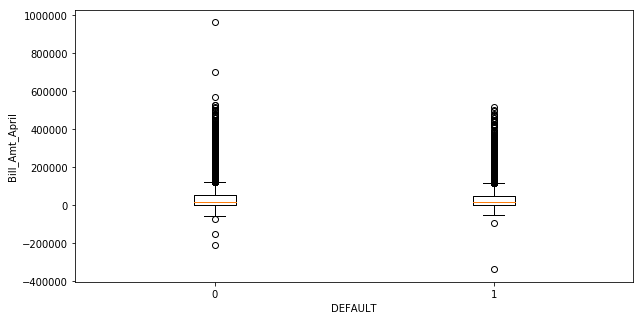


Test of Normality: 
Shapiro on grp0 = (0.6797305345535278, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.6612201929092407, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=0.0031074792777802704, pvalue=0.9555451343736254)
[Variance of grp0 and grp1 are EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=77513553.0, pvalue=0.4947404201391831)

Failed to Reject H0: [Means of grp0 and grp1 are EQUAL]

-------------------------------------------------------------------------
H0: The mean of Pre_Pay_Sept is equal for both categories of DEFAULT
Ha: The mean of Pre_Pay_Sept is NOT equal for both categories of DEFAULT

Mean of grp0 = 6307.337356617018
Mean of grp1 = 3397.0441531042798


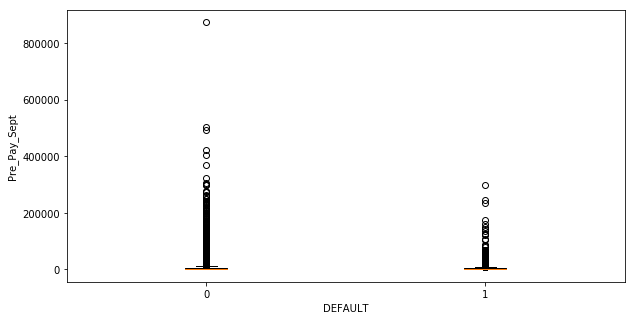


Test of Normality: 
Shapiro on grp0 = (0.2733006477355957, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.2703394293785095, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=3231.443698014351, pvalue=0.0)
[Variance of grp0 and grp1 are NOT EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=60262771.0, pvalue=2.3083295995929906e-170)

Reject H0: [Means of grp0 and grp1 are NOT EQUAL]

-------------------------------------------------------------------------
H0: The mean of Pre_Pay_Aug is equal for both categories of DEFAULT
Ha: The mean of Pre_Pay_Aug is NOT equal for both categories of DEFAULT

Mean of grp0 = 6640.465074473549
Mean of grp1 = 3388.6496383363474


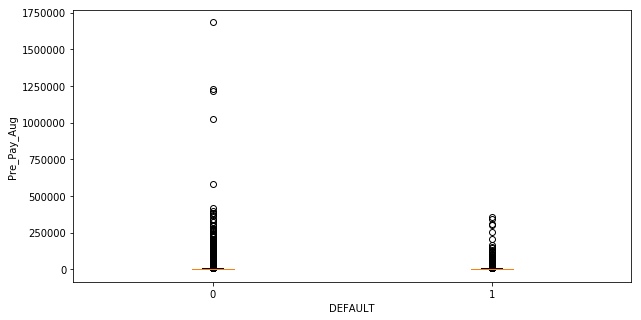


Test of Normality: 
Shapiro on grp0 = (0.17783886194229126, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.19398903846740723, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=4472.770678192095, pvalue=0.0)
[Variance of grp0 and grp1 are NOT EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=61289748.0, pvalue=4.977487984626587e-151)

Reject H0: [Means of grp0 and grp1 are NOT EQUAL]

-------------------------------------------------------------------------
H0: The mean of Pre_Pay_July is equal for both categories of DEFAULT
Ha: The mean of Pre_Pay_July is NOT equal for both categories of DEFAULT

Mean of grp0 = 5753.496832734121
Mean of grp1 = 3367.351567209162


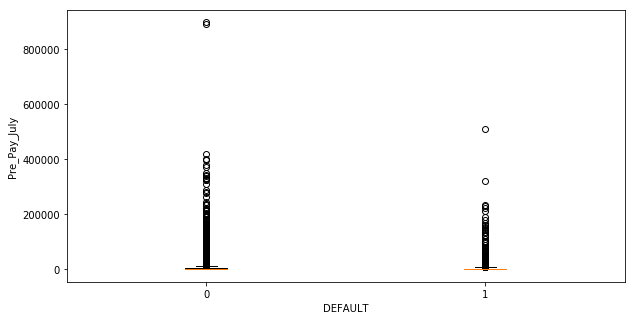


Test of Normality: 
Shapiro on grp0 = (0.24292105436325073, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.18652260303497314, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=1197.6239497066067, pvalue=2.0030028753898186e-262)
[Variance of grp0 and grp1 are NOT EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=62551544.5, pvalue=4.496354246214866e-129)

Reject H0: [Means of grp0 and grp1 are NOT EQUAL]

-------------------------------------------------------------------------
H0: The mean of Pre_Pay_Jun is equal for both categories of DEFAULT
Ha: The mean of Pre_Pay_Jun is NOT equal for both categories of DEFAULT

Mean of grp0 = 5300.529318609827
Mean of grp1 = 3155.6267329716698


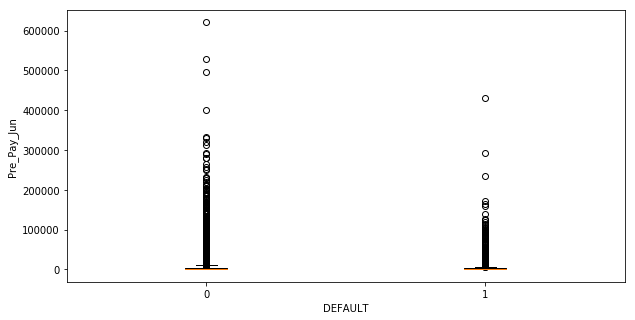


Test of Normality: 
Shapiro on grp0 = (0.26650571823120117, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.2199864387512207, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=1409.2246646223693, pvalue=2.07919156671918e-308)
[Variance of grp0 and grp1 are NOT EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=63790208.5, pvalue=3.642347332534603e-109)

Reject H0: [Means of grp0 and grp1 are NOT EQUAL]

-------------------------------------------------------------------------
H0: The mean of Pre_Pay_May is equal for both categories of DEFAULT
Ha: The mean of Pre_Pay_May is NOT equal for both categories of DEFAULT

Mean of grp0 = 5248.22029618216
Mean of grp1 = 3219.1395418927063


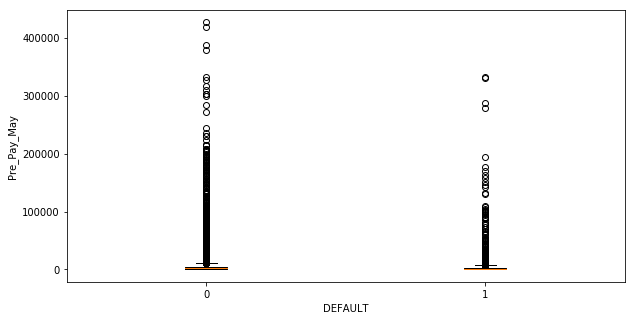


Test of Normality: 
Shapiro on grp0 = (0.27880585193634033, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.2033451795578003, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=810.5315194416158, pvalue=2.7690945484896094e-178)
[Variance of grp0 and grp1 are NOT EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=65021456.0, pvalue=5.624349416331451e-91)

Reject H0: [Means of grp0 and grp1 are NOT EQUAL]

-------------------------------------------------------------------------
H0: The mean of Pre_Pay_April is equal for both categories of DEFAULT
Ha: The mean of Pre_Pay_April is NOT equal for both categories of DEFAULT

Mean of grp0 = 5719.371768532786
Mean of grp1 = 3441.4820675105484


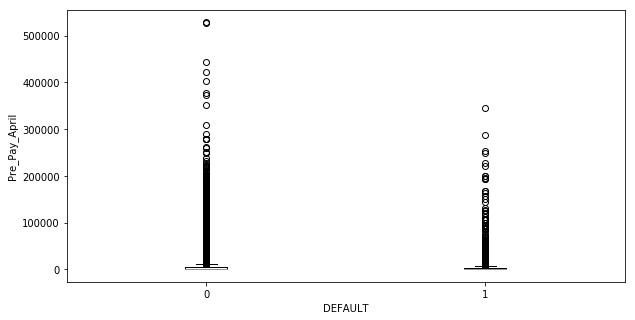


Test of Normality: 
Shapiro on grp0 = (0.263838529586792, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.20247554779052734, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=1008.2313409483037, pvalue=2.9179399561113864e-221)
[Variance of grp0 and grp1 are NOT EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=64517205.0, pvalue=1.5920582681736708e-98)

Reject H0: [Means of grp0 and grp1 are NOT EQUAL]

-------------------------------------------------------------------------
Columns Rejected H0 : ['LIMIT_BAL', 'Bill_Amt_Sept', 'Bill_Amt_Aug', 'Bill_Amt_July', 'Pre_Pay_Sept', 'Pre_Pay_Aug', 'Pre_Pay_July', 'Pre_Pay_Jun', 'Pre_Pay_May', 'Pre_Pay_April']

Columns Failed to Reject H0 : ['AGE', 'Bill_Amt_Jun', 'Bill_Amt_May', 'Bill_Amt_April']


In [19]:
num_cols = ['LIMIT_BAL', 'AGE', 'Bill_Amt_Sept', 'Bill_Amt_Aug', 'Bill_Amt_July', 'Bill_Amt_Jun', 
            'Bill_Amt_May', 'Bill_Amt_April', 'Pre_Pay_Sept', 'Pre_Pay_Aug', 'Pre_Pay_July', 'Pre_Pay_Jun', 
            'Pre_Pay_May', 'Pre_Pay_April']

reject = []
not_reject = []
for col in num_cols:
    rejectH0 = two_sample_ttest(cc['DEFAULT'], cc[col])
    
    if rejectH0:
        reject.append(col)
    else:
        not_reject.append(col)
    
print('Columns Rejected H0 :', reject)
print()
print('Columns Failed to Reject H0 :', not_reject)

### Bill Amt Sum

H0: The mean of Bill_Amt_Sum is equal for both categories of DEFAULT
Ha: The mean of Bill_Amt_Sum is NOT equal for both categories of DEFAULT

Mean of grp0 = 272428.90784968325
Mean of grp1 = 260822.63878842676


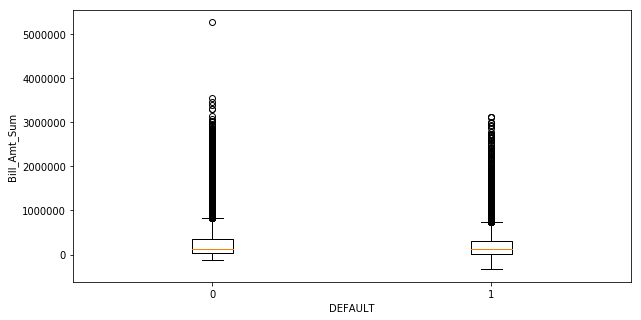


Test of Normality: 
Shapiro on grp0 = (0.7028784155845642, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.6676371097564697, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=4.595451106534174, pvalue=0.03205690571907701)
[Variance of grp0 and grp1 are NOT EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=74628184.0, pvalue=1.678561587456231e-06)

Reject H0: [Means of grp0 and grp1 are NOT EQUAL]

-------------------------------------------------------------------------


True

In [20]:
cc['Bill_Amt_Sum'] = cc.loc[:,'Bill_Amt_Sept':'Bill_Amt_April'].sum(axis=1)
two_sample_ttest(cc['DEFAULT'], cc['Bill_Amt_Sum'])

### Pre Pay Sum

H0: The mean of Pre_Pay_Sum is equal for both categories of DEFAULT
Ha: The mean of Pre_Pay_Sum is NOT equal for both categories of DEFAULT

Mean of grp0 = 34969.42064714946
Mean of grp1 = 19969.293701024715


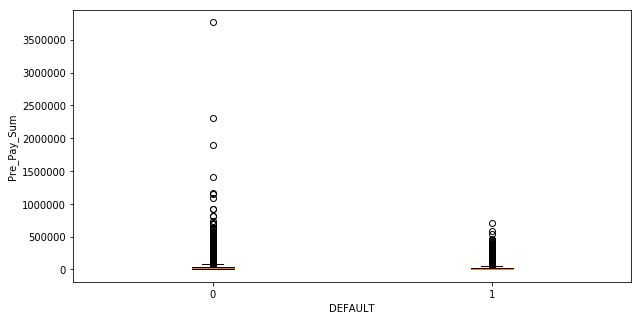


Test of Normality: 
Shapiro on grp0 = (0.4285348057746887, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.4519764184951782, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=2724.2852195916103, pvalue=0.0)
[Variance of grp0 and grp1 are NOT EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=58744020.0, pvalue=3.712806958001637e-200)

Reject H0: [Means of grp0 and grp1 are NOT EQUAL]

-------------------------------------------------------------------------


True

In [21]:
cc['Pre_Pay_Sum'] = cc.loc[:,'Pre_Pay_Sept':'Pre_Pay_April'].sum(axis=1)
two_sample_ttest(cc['DEFAULT'], cc['Pre_Pay_Sum'])

### Fraction paid per month

In [22]:
cc['Fraction_Paid_Sept'] = (cc['Pre_Pay_Sept'] / cc['Bill_Amt_Aug'])
cc['Fraction_Paid_Aug'] = (cc['Pre_Pay_Aug'] / cc['Bill_Amt_July'])
cc['Fraction_Paid_July'] = (cc['Pre_Pay_July'] / cc['Bill_Amt_Jun'])
cc['Fraction_Paid_Jun'] = (cc['Pre_Pay_Jun'] / cc['Bill_Amt_May'])
cc['Fraction_Paid_May'] = (cc['Pre_Pay_May'] / cc['Bill_Amt_April'])

cc['Fraction_Paid_Total'] = (cc.loc[:,'Pre_Pay_Sept':'Pre_Pay_May'].sum(axis=1) 
                             / cc.loc[:,'Bill_Amt_Aug':'Bill_Amt_April'].sum(axis=1))

cc.loc[:,'Fraction_Paid_Sept':'Fraction_Paid_Total'] = cc.loc[:,'Fraction_Paid_Sept':'Fraction_Paid_Total'].fillna(0).clip(0,1)

H0: The mean of Fraction_Paid_Sept is equal for both categories of DEFAULT
Ha: The mean of Fraction_Paid_Sept is NOT equal for both categories of DEFAULT

Mean of grp0 = 0.3247656732188412
Mean of grp1 = 0.20521348317502658


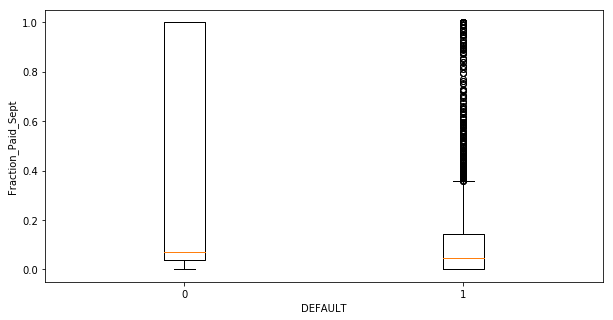


Test of Normality: 
Shapiro on grp0 = (0.6707953214645386, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.5845041275024414, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=330.1054386187688, pvalue=9.116385818887772e-74)
[Variance of grp0 and grp1 are NOT EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=62412503.0, pvalue=1.0570591414780752e-132)

Reject H0: [Means of grp0 and grp1 are NOT EQUAL]

-------------------------------------------------------------------------
H0: The mean of Fraction_Paid_Aug is equal for both categories of DEFAULT
Ha: The mean of Fraction_Paid_Aug is NOT equal for both categories of DEFAULT

Mean of grp0 = 0.3222562280248336
Mean of grp1 = 0.20481507678993677


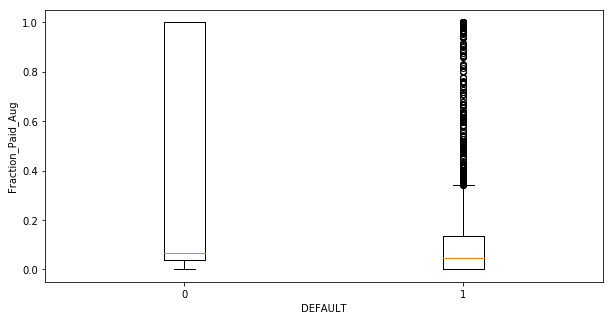


Test of Normality: 
Shapiro on grp0 = (0.6674748063087463, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.5778483152389526, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=321.1301234702225, pvalue=8.217452765337212e-72)
[Variance of grp0 and grp1 are NOT EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=63194399.5, pvalue=1.2554449731851626e-119)

Reject H0: [Means of grp0 and grp1 are NOT EQUAL]

-------------------------------------------------------------------------
H0: The mean of Fraction_Paid_July is equal for both categories of DEFAULT
Ha: The mean of Fraction_Paid_July is NOT equal for both categories of DEFAULT

Mean of grp0 = 0.30115904624139134
Mean of grp1 = 0.186966311154598


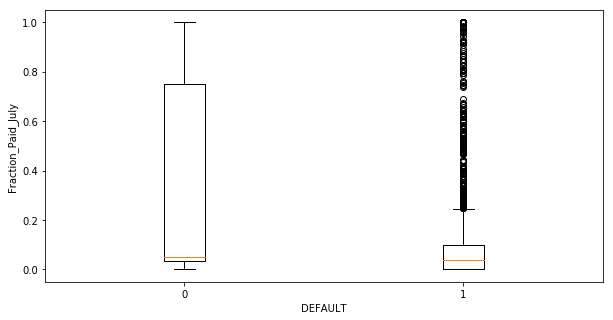


Test of Normality: 
Shapiro on grp0 = (0.6489360332489014, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.5446343421936035, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=359.23709525365075, pvalue=4.127667976764346e-80)
[Variance of grp0 and grp1 are NOT EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=63683474.5, pvalue=8.902206670972528e-112)

Reject H0: [Means of grp0 and grp1 are NOT EQUAL]

-------------------------------------------------------------------------
H0: The mean of Fraction_Paid_Jun is equal for both categories of DEFAULT
Ha: The mean of Fraction_Paid_Jun is NOT equal for both categories of DEFAULT

Mean of grp0 = 0.2900512721558958
Mean of grp1 = 0.18316714223725672


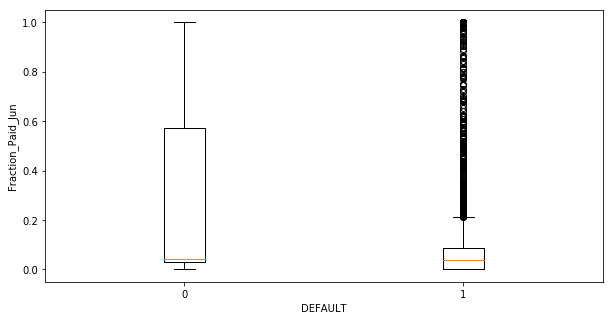


Test of Normality: 
Shapiro on grp0 = (0.6381229162216187, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.5342806577682495, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=332.70926507153837, pvalue=2.470091284469175e-74)
[Variance of grp0 and grp1 are NOT EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=64988746.5, pvalue=3.443488307232287e-92)

Reject H0: [Means of grp0 and grp1 are NOT EQUAL]

-------------------------------------------------------------------------
H0: The mean of Fraction_Paid_May is equal for both categories of DEFAULT
Ha: The mean of Fraction_Paid_May is NOT equal for both categories of DEFAULT

Mean of grp0 = 0.29773646795377
Mean of grp1 = 0.19492719868259445


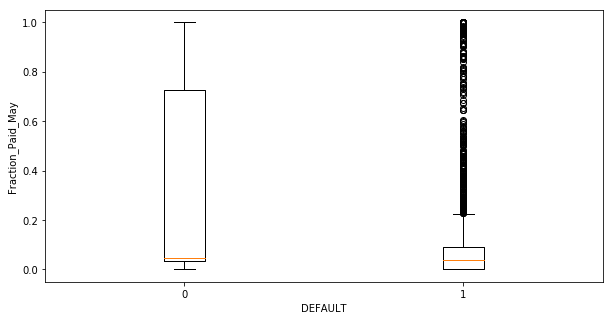


Test of Normality: 
Shapiro on grp0 = (0.6447505354881287, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.5471824407577515, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=261.5369898345618, pvalue=7.934010777176446e-59)
[Variance of grp0 and grp1 are NOT EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=65476464.0, pvalue=1.6032509167037918e-85)

Reject H0: [Means of grp0 and grp1 are NOT EQUAL]

-------------------------------------------------------------------------
H0: The mean of Fraction_Paid_Total is equal for both categories of DEFAULT
Ha: The mean of Fraction_Paid_Total is NOT equal for both categories of DEFAULT

Mean of grp0 = 0.36513044188447097
Mean of grp1 = 0.24166850851998242


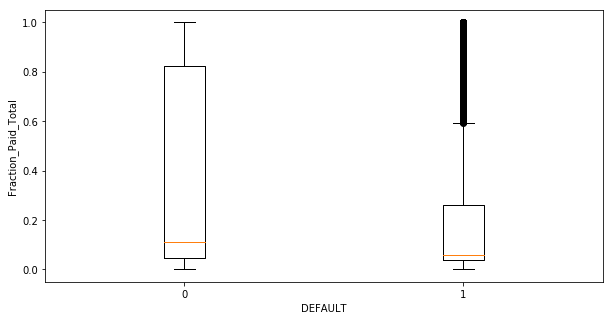


Test of Normality: 
Shapiro on grp0 = (0.7462570667266846, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.647523820400238, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=188.38475221697766, pvalue=7.15999087284199e-43)
[Variance of grp0 and grp1 are NOT EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=60606199.0, pvalue=5.470317718651866e-164)

Reject H0: [Means of grp0 and grp1 are NOT EQUAL]

-------------------------------------------------------------------------


In [23]:
start_idx = np.where(cc.columns=='Fraction_Paid_Sept')[0][0]
end_idx = np.where(cc.columns=='Fraction_Paid_Total')[0][0] + 1
for col in cc.columns[start_idx:end_idx]:
    two_sample_ttest(cc['DEFAULT'], cc[col])

In [24]:
cc.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Repay_Sept',
       'Repay_Aug', 'Repay_July', 'Repay_Jun', 'Repay_May', 'Repay_April',
       'Bill_Amt_Sept', 'Bill_Amt_Aug', 'Bill_Amt_July', 'Bill_Amt_Jun',
       'Bill_Amt_May', 'Bill_Amt_April', 'Pre_Pay_Sept', 'Pre_Pay_Aug',
       'Pre_Pay_July', 'Pre_Pay_Jun', 'Pre_Pay_May', 'Pre_Pay_April',
       'DEFAULT', 'Repay_Sept_Cut', 'Repay_Aug_Cut', 'Repay_July_Cut',
       'Repay_Jun_Cut', 'Repay_May_Cut', 'Repay_April_Cut', 'Bill_Amt_Sum',
       'Pre_Pay_Sum', 'Fraction_Paid_Sept', 'Fraction_Paid_Aug',
       'Fraction_Paid_July', 'Fraction_Paid_Jun', 'Fraction_Paid_May',
       'Fraction_Paid_Total'],
      dtype='object')

### Fraction of LIMIT BALANCE spent

In [25]:
cc['Fraction_Limit_Sept'] = cc['Bill_Amt_Sept'] / cc['LIMIT_BAL']
cc['Fraction_Limit_Aug'] = cc['Bill_Amt_Aug'] / cc['LIMIT_BAL']
cc['Fraction_Limit_July'] = cc['Bill_Amt_July'] / cc['LIMIT_BAL']
cc['Fraction_Limit_Jun'] = cc['Bill_Amt_Jun'] / cc['LIMIT_BAL']
cc['Fraction_Limit_May'] = cc['Bill_Amt_May'] / cc['LIMIT_BAL']
cc['Fraction_Limit_April'] = cc['Bill_Amt_April'] / cc['LIMIT_BAL']

H0: The mean of Fraction_Limit_Sept is equal for both categories of DEFAULT
Ha: The mean of Fraction_Limit_Sept is NOT equal for both categories of DEFAULT

Mean of grp0 = 0.4048763576425393
Mean of grp1 = 0.490297215157841


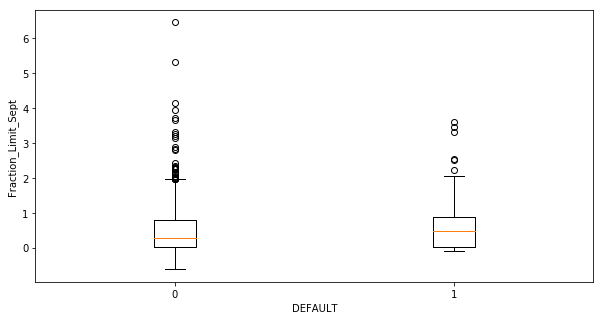


Test of Normality: 
Shapiro on grp0 = (0.841924786567688, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.878785252571106, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=3.369711883390951, pvalue=0.06640536757506277)
[Variance of grp0 and grp1 are EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=69653897.5, pvalue=6.422882044989897e-37)

Reject H0: [Means of grp0 and grp1 are NOT EQUAL]

-------------------------------------------------------------------------
H0: The mean of Fraction_Limit_Aug is equal for both categories of DEFAULT
Ha: The mean of Fraction_Limit_Aug is NOT equal for both categories of DEFAULT

Mean of grp0 = 0.3897751886137699
Mean of grp1 = 0.4862915855907574


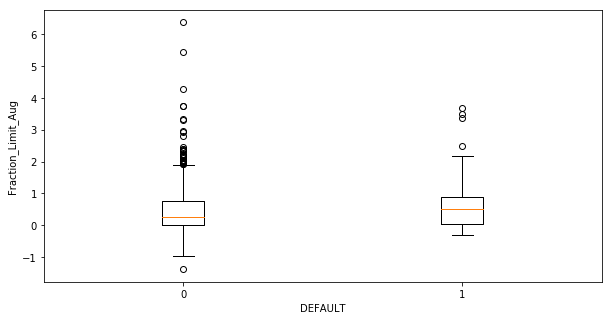


Test of Normality: 
Shapiro on grp0 = (0.8397222757339478, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.8755367398262024, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=9.960200551701975, pvalue=0.0015996062852409794)
[Variance of grp0 and grp1 are NOT EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=68428997.5, pvalue=1.2320189949251899e-48)

Reject H0: [Means of grp0 and grp1 are NOT EQUAL]

-------------------------------------------------------------------------
H0: The mean of Fraction_Limit_July is equal for both categories of DEFAULT
Ha: The mean of Fraction_Limit_July is NOT equal for both categories of DEFAULT

Mean of grp0 = 0.37023992355786567
Mean of grp1 = 0.4694822289505529


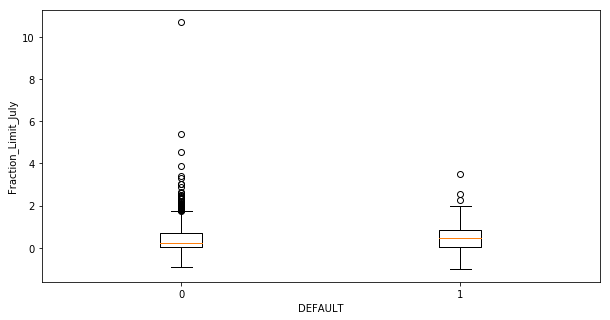


Test of Normality: 
Shapiro on grp0 = (0.8235360980033875, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.8800553679466248, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=11.339832300951269, pvalue=0.0007586217422611991)
[Variance of grp0 and grp1 are NOT EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=68035585.0, pvalue=9.131137098691069e-53)

Reject H0: [Means of grp0 and grp1 are NOT EQUAL]

-------------------------------------------------------------------------
H0: The mean of Fraction_Limit_Jun is equal for both categories of DEFAULT
Ha: The mean of Fraction_Limit_Jun is NOT equal for both categories of DEFAULT

Mean of grp0 = 0.336725389159962
Mean of grp1 = 0.4396978355526364


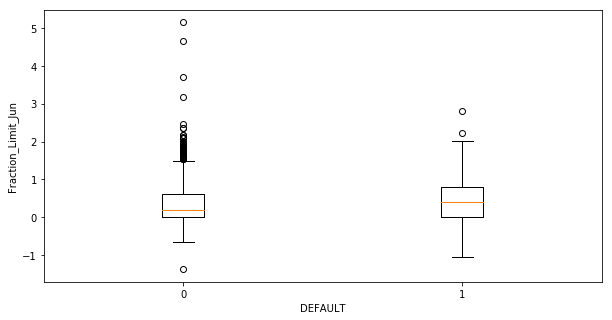


Test of Normality: 
Shapiro on grp0 = (0.8438138961791992, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.8853297233581543, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=66.07938617817194, pvalue=4.3312196857551365e-16)
[Variance of grp0 and grp1 are NOT EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=67331757.5, pvalue=1.3976071405509077e-60)

Reject H0: [Means of grp0 and grp1 are NOT EQUAL]

-------------------------------------------------------------------------
H0: The mean of Fraction_Limit_May is equal for both categories of DEFAULT
Ha: The mean of Fraction_Limit_May is NOT equal for both categories of DEFAULT

Mean of grp0 = 0.3108477771418148
Mean of grp1 = 0.41148142553490774


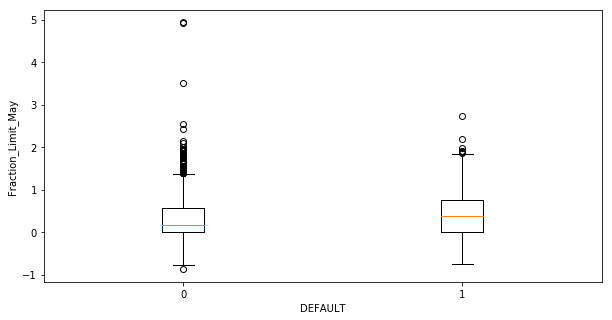


Test of Normality: 
Shapiro on grp0 = (0.8410829901695251, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.8840464949607849, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=106.59321591669257, pvalue=5.466000041937404e-25)
[Variance of grp0 and grp1 are NOT EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=67518392.0, pvalue=1.7590753913268248e-58)

Reject H0: [Means of grp0 and grp1 are NOT EQUAL]

-------------------------------------------------------------------------
H0: The mean of Fraction_Limit_April is equal for both categories of DEFAULT
Ha: The mean of Fraction_Limit_April is NOT equal for both categories of DEFAULT

Mean of grp0 = 0.29588151434360715
Mean of grp1 = 0.398519099831977


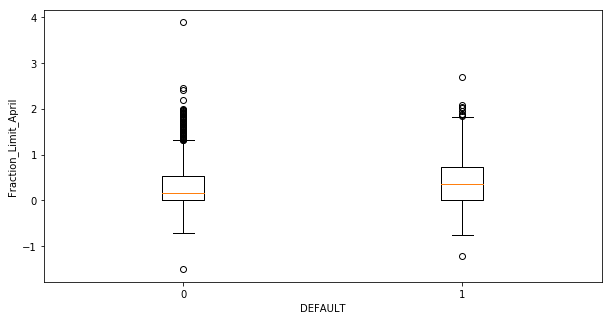


Test of Normality: 
Shapiro on grp0 = (0.8377474546432495, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.8766144514083862, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=155.89337588044106, pvalue=8.932381335130718e-36)
[Variance of grp0 and grp1 are NOT EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=67310738.5, pvalue=6.815378127867414e-61)

Reject H0: [Means of grp0 and grp1 are NOT EQUAL]

-------------------------------------------------------------------------


In [26]:
start_idx = np.where(cc.columns=='Fraction_Limit_Sept')[0][0]
end_idx = np.where(cc.columns=='Fraction_Limit_April')[0][0] + 1
for col in cc.columns[start_idx:end_idx]:
    two_sample_ttest(cc['DEFAULT'], cc[col])

### Number Months of Late Payment

H0: The mean of Num_Late_Payments is equal for both categories of DEFAULT
Ha: The mean of Num_Late_Payments is NOT equal for both categories of DEFAULT

Mean of grp0 = 0.5041944872453347
Mean of grp1 = 1.9960819770946354


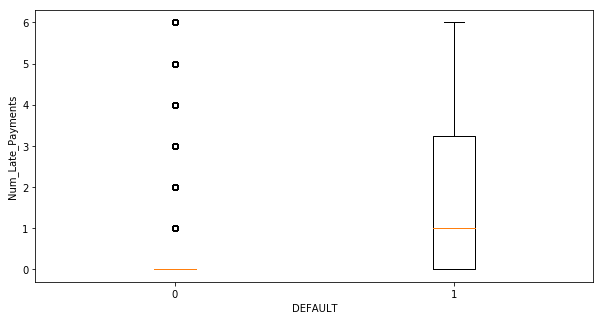


Test of Normality: 
Shapiro on grp0 = (0.5023685097694397, 0.0) [grp0 DOES NOT follow normal distribution]
Shapiro on grp1 = (0.8193399906158447, 0.0) [grp1 DOES NOT follow normal distribution]

Test of Variance:
Bartlett Test:
BartlettResult(statistic=4706.017625331034, pvalue=0.0)
[Variance of grp0 and grp1 are NOT EQUAL]

Non-parametric Test of Means:
MannwhitneyuResult(statistic=42465114.0, pvalue=0.0)

Reject H0: [Means of grp0 and grp1 are NOT EQUAL]

-------------------------------------------------------------------------


True

In [27]:
cc['Num_Late_Payments'] = cc.loc[:,'Repay_Sept':'Repay_April'].clip(0,1).sum(axis=1)
two_sample_ttest(cc['DEFAULT'], cc['Num_Late_Payments'])

Next Steps:
- Variable Transformation
- Dimensionalty Reduction
- Outlier Identification and Treatment
- Baseline Model
- Ensemble Methods
- Evaluation Metrics

In [28]:
cc.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Repay_Sept',
       'Repay_Aug', 'Repay_July', 'Repay_Jun', 'Repay_May', 'Repay_April',
       'Bill_Amt_Sept', 'Bill_Amt_Aug', 'Bill_Amt_July', 'Bill_Amt_Jun',
       'Bill_Amt_May', 'Bill_Amt_April', 'Pre_Pay_Sept', 'Pre_Pay_Aug',
       'Pre_Pay_July', 'Pre_Pay_Jun', 'Pre_Pay_May', 'Pre_Pay_April',
       'DEFAULT', 'Repay_Sept_Cut', 'Repay_Aug_Cut', 'Repay_July_Cut',
       'Repay_Jun_Cut', 'Repay_May_Cut', 'Repay_April_Cut', 'Bill_Amt_Sum',
       'Pre_Pay_Sum', 'Fraction_Paid_Sept', 'Fraction_Paid_Aug',
       'Fraction_Paid_July', 'Fraction_Paid_Jun', 'Fraction_Paid_May',
       'Fraction_Paid_Total', 'Fraction_Limit_Sept', 'Fraction_Limit_Aug',
       'Fraction_Limit_July', 'Fraction_Limit_Jun', 'Fraction_Limit_May',
       'Fraction_Limit_April', 'Num_Late_Payments'],
      dtype='object')

## Baeline Model

In [40]:
def evaluate_model(model, X, y, display=True):
    ypred = model.predict(X)
    
    accuracy = metrics.accuracy_score(y, ypred)
    precision = metrics.precision_score(y, ypred)
    recall = metrics.recall_score(y, ypred)
    f1 = metrics.f1_score(y, ypred)
    
    yprob = model.predict_proba(X)
    fpr,tpr,threshold = metrics.roc_curve(y,yprob[:,1])
    roc_auc = metrics.roc_auc_score(y,yprob[:,1])

    if display:
        # confusion matrix
        cm = metrics.confusion_matrix(y, ypred)
        sns.heatmap(cm, annot=True, fmt='d')
        plt.show()
        
        # scores
        print('Accuracy =', accuracy)
        print('Precision =', precision)
        print('Recall =', recall)
        print('F1 Score =', f1)
        print()
        
        # ROC curve
        plt.figure()
        lw = 2
        plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
        plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.show()
        
    else:
        return accuracy, precision, recall, f1, roc_auc

In [45]:
def build_baseline_model(model, X, y, display=True):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)
    model.fit(Xtrain, ytrain)
    
    if display:
        print(X.columns)
        print()
        
        print('Training score =', model.score(Xtrain, ytrain))
        print('Test score =', model.score(Xtest, ytest))
    
    return evaluate_model(model, Xtest, ytest, display)

In [46]:
cc.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Repay_Sept',
       'Repay_Aug', 'Repay_July', 'Repay_Jun', 'Repay_May', 'Repay_April',
       'Bill_Amt_Sept', 'Bill_Amt_Aug', 'Bill_Amt_July', 'Bill_Amt_Jun',
       'Bill_Amt_May', 'Bill_Amt_April', 'Pre_Pay_Sept', 'Pre_Pay_Aug',
       'Pre_Pay_July', 'Pre_Pay_Jun', 'Pre_Pay_May', 'Pre_Pay_April',
       'DEFAULT', 'Repay_Sept_Cut', 'Repay_Aug_Cut', 'Repay_July_Cut',
       'Repay_Jun_Cut', 'Repay_May_Cut', 'Repay_April_Cut', 'Bill_Amt_Sum',
       'Pre_Pay_Sum', 'Fraction_Paid_Sept', 'Fraction_Paid_Aug',
       'Fraction_Paid_July', 'Fraction_Paid_Jun', 'Fraction_Paid_May',
       'Fraction_Paid_Total', 'Fraction_Limit_Sept', 'Fraction_Limit_Aug',
       'Fraction_Limit_July', 'Fraction_Limit_Jun', 'Fraction_Limit_May',
       'Fraction_Limit_April', 'Num_Late_Payments'],
      dtype='object')

In [47]:
cc.columns[np.r_[2:5, 6:24]]

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'Repay_Sept', 'Repay_Aug', 'Repay_July',
       'Repay_Jun', 'Repay_May', 'Repay_April', 'Bill_Amt_Sept',
       'Bill_Amt_Aug', 'Bill_Amt_July', 'Bill_Amt_Jun', 'Bill_Amt_May',
       'Bill_Amt_April', 'Pre_Pay_Sept', 'Pre_Pay_Aug', 'Pre_Pay_July',
       'Pre_Pay_Jun', 'Pre_Pay_May', 'Pre_Pay_April'],
      dtype='object')

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'Repay_Sept', 'Repay_Aug', 'Repay_July',
       'Repay_Jun', 'Repay_May', 'Repay_April', 'Bill_Amt_Sept',
       'Bill_Amt_Aug', 'Bill_Amt_July', 'Bill_Amt_Jun', 'Bill_Amt_May',
       'Bill_Amt_April', 'Pre_Pay_Sept', 'Pre_Pay_Aug', 'Pre_Pay_July',
       'Pre_Pay_Jun', 'Pre_Pay_May', 'Pre_Pay_April'],
      dtype='object')

Training score = 0.7822857142857143
Test score = 0.7803333333333333


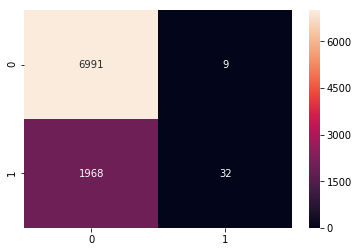

Accuracy = 0.7803333333333333
Precision = 0.7804878048780488
Recall = 0.016
F1 Score = 0.03135717785399314



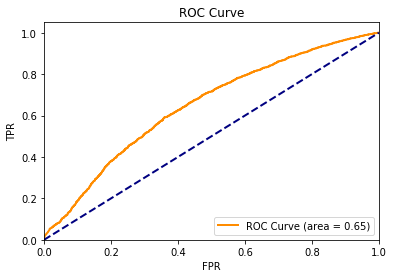

In [57]:
X = cc[cc.columns[np.r_[2:5, 6:24]]]
y = cc['DEFAULT']

build_baseline_model(LogisticRegression(), X, y)

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'Bill_Amt_Sept', 'Bill_Amt_Aug',
       'Bill_Amt_July', 'Bill_Amt_Jun', 'Bill_Amt_May', 'Bill_Amt_April',
       'Pre_Pay_Sept', 'Pre_Pay_Aug', 'Pre_Pay_July', 'Pre_Pay_Jun',
       'Pre_Pay_May', 'Pre_Pay_April', 'Repay_Sept_Cut', 'Repay_Aug_Cut',
       'Repay_July_Cut', 'Repay_Jun_Cut', 'Repay_May_Cut', 'Repay_April_Cut'],
      dtype='object')

Training score = 0.7822857142857143
Test score = 0.7803333333333333


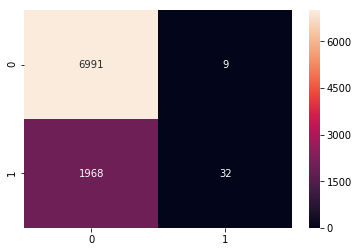

Accuracy = 0.7803333333333333
Precision = 0.7804878048780488
Recall = 0.016
F1 Score = 0.03135717785399314



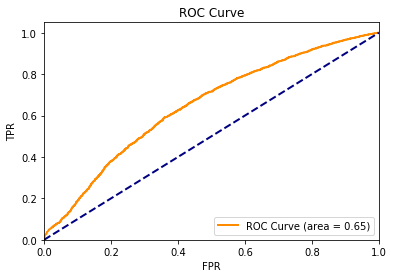

In [49]:
X = cc[cc.columns[np.r_[2:5, 12:24, 25:31]]]
y = cc['DEFAULT']

build_baseline_model(LogisticRegression(), X, y)

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'Repay_Sept', 'Repay_Aug', 'Repay_July',
       'Repay_Jun', 'Repay_May', 'Repay_April', 'Fraction_Paid_Aug',
       'Fraction_Paid_July', 'Fraction_Paid_Jun', 'Fraction_Paid_May'],
      dtype='object')

Training score = 0.8102380952380952
Test score = 0.8073333333333333


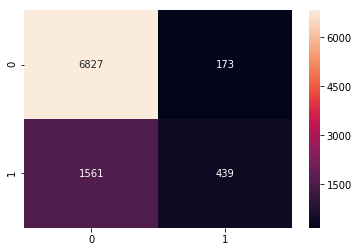

Accuracy = 0.8073333333333333
Precision = 0.7173202614379085
Recall = 0.2195
F1 Score = 0.33614088820826954



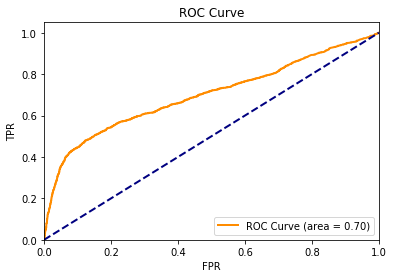

In [50]:
X = cc[cc.columns[np.r_[2:5, 6:12, 34:38]]]
y = cc['DEFAULT']

build_baseline_model(LogisticRegression(), X, y)

In [51]:
cc.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Repay_Sept',
       'Repay_Aug', 'Repay_July', 'Repay_Jun', 'Repay_May', 'Repay_April',
       'Bill_Amt_Sept', 'Bill_Amt_Aug', 'Bill_Amt_July', 'Bill_Amt_Jun',
       'Bill_Amt_May', 'Bill_Amt_April', 'Pre_Pay_Sept', 'Pre_Pay_Aug',
       'Pre_Pay_July', 'Pre_Pay_Jun', 'Pre_Pay_May', 'Pre_Pay_April',
       'DEFAULT', 'Repay_Sept_Cut', 'Repay_Aug_Cut', 'Repay_July_Cut',
       'Repay_Jun_Cut', 'Repay_May_Cut', 'Repay_April_Cut', 'Bill_Amt_Sum',
       'Pre_Pay_Sum', 'Fraction_Paid_Sept', 'Fraction_Paid_Aug',
       'Fraction_Paid_July', 'Fraction_Paid_Jun', 'Fraction_Paid_May',
       'Fraction_Paid_Total', 'Fraction_Limit_Sept', 'Fraction_Limit_Aug',
       'Fraction_Limit_July', 'Fraction_Limit_Jun', 'Fraction_Limit_May',
       'Fraction_Limit_April', 'Num_Late_Payments'],
      dtype='object')

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'Repay_Sept', 'Repay_Aug', 'Repay_July',
       'Repay_Jun', 'Repay_May', 'Repay_April', 'Fraction_Paid_Aug',
       'Fraction_Paid_July', 'Fraction_Paid_Jun', 'Fraction_Paid_May',
       'Fraction_Limit_Sept', 'Fraction_Limit_Aug', 'Fraction_Limit_July',
       'Fraction_Limit_Jun', 'Fraction_Limit_May', 'Fraction_Limit_April',
       'Num_Late_Payments'],
      dtype='object')

Training score = 0.7831428571428571
Test score = 0.7823333333333333


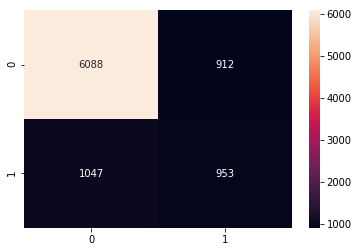

Accuracy = 0.7823333333333333
Precision = 0.5109919571045577
Recall = 0.4765
F1 Score = 0.493143596377749



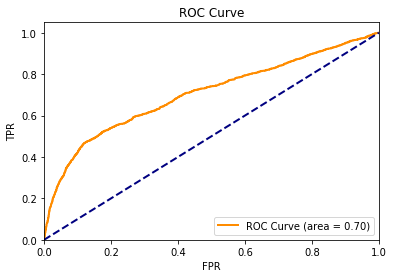

In [58]:
X = cc[cc.columns[np.r_[2:5, 6:12, 34:38, 39:46]]]
y = cc['DEFAULT']

build_baseline_model(GaussianNB(), X, y)

In [53]:
lr_scores = build_baseline_model(LogisticRegression(), X, y, display=False)
dt_scores = build_baseline_model(DecisionTreeClassifier(), X, y, display=False)
rf_scores = build_baseline_model(RandomForestClassifier(), X, y, display=False)
knn_scores = build_baseline_model(KNeighborsClassifier(), X, y, display=False)
nb_scores = build_baseline_model(GaussianNB(), X, y, display=False)

pd.DataFrame({'Logistic Regression': lr_scores,
              'Decision Tree': dt_scores,
              'Random Forest': rf_scores,
              'KNN': knn_scores,
              'Naive Bayes': nb_scores},
             index = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
            ).T

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,0.806889,0.659756,0.2705,0.383688,0.738196
Decision Tree,0.727111,0.385772,0.3850,0.385385,0.614896
Random Forest,0.800000,0.594162,0.3155,0.412149,0.724071
KNN,0.794444,0.558962,0.3555,0.434597,0.708580
Naive Bayes,0.782333,0.510992,0.4765,0.493144,0.704214


- Class imbalance
    - distribution of independent variables before and after SMOTE